In [164]:
import matplotlib.pyplot as plt
import random
import numpy as np
import PIL

class Visualizer():
    def __init__(self, dataset, image_extractor=None, label_extractor=None):
        self.dataset = list(dataset)
        self.image_extractor = image_extractor
        self.label_extractor = label_extractor
        
    def visualize(self, rows=6, cols=6, figsize=(12, 12)):
        # Visualizer
        fig=plt.figure(figsize=figsize)
        for i in range(1, rows * cols + 1):
            sample = random.choice(self.dataset)
            if self.image_extractor:
                img = self.image_extractor(sample)
            else:
                img = sample
                
            # An image can be a string (filepath), numpy array, PIL Image
            ax = fig.add_subplot(rows, cols, i)
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            
            if self.label_extractor:
                label = self.label_extractor(sample)
                ax.set_title(label)
                
            if type(img) == PIL.Image:
                img = np.array(img)
            if type(img) == torch.Tensor:
                img = img.numpy()
            plt.imshow(img)
        plt.show()


In [165]:
from torchvision.datasets import CIFAR10

In [166]:
cifar = CIFAR10(root='./data', train=True, download=True)


Files already downloaded and verified


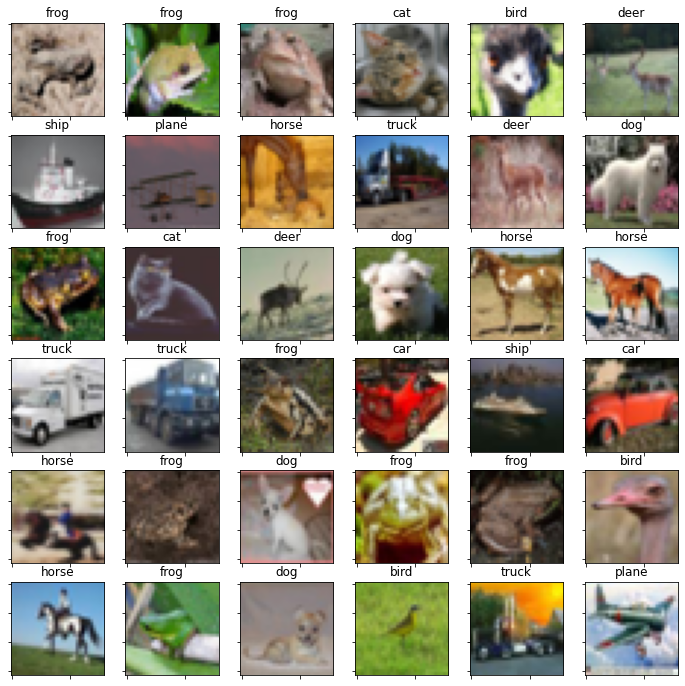

In [168]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

visualizer = Visualizer(
    cifar,
    image_extractor=lambda x: x[0],
    label_extractor=lambda x: classes[x[1]],
)
visualizer.visualize()